In [1]:
from pythtb import * # import TB model class
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import ase
import ase.io
import ase.neighborlist
import ase.visualize.plot

sns_colors = sns.color_palette(n_colors=2)

In [2]:
gnf_size = 6
stone_wales = "_stone_wales"
stone_wales = ""

sw_short = "_SW"
sw_short = ""

M_param = 3
U_param = 19

In [3]:
file_name = "../xyz_files/gnf/gnf_size_{}x{}{}.xyz".format(gnf_size, gnf_size, stone_wales)
geom = ase.io.read(file_name)
lat = [
    [1.0,0.0],
    [0.0,1.0]
]
geom.center(about=0.0)
orb = []

for at in geom:
    orb.append(at.position[:2])
    

x_max, y_max = np.max(orb, axis=0)
x_min, y_min = np.min(orb, axis=0)

max_coord_x = x_max + 1
min_coord_x = x_min - 1
max_coord_y = y_max + 1
min_coord_y = y_min - 1

In [4]:
p_results_file = "../calculations/gnf/gnf_{}x{}{}_M{}_U{}.txt".format(
    gnf_size,
    gnf_size,
    sw_short,
    M_param,
    U_param,
)

p_f = open(p_results_file, "r")

p_num_lines = sum(1 for line in open(p_results_file, "r"))
p_evals = np.zeros(p_num_lines, dtype=float)
p_counter = 0

for p_line in p_f:
    p_spin = p_line[:1]
    p_line = p_line[2:]

    p_splitted_line = p_line.split(' ')

    p_evals[p_counter] = np.float64(p_splitted_line[0])
    p_counter = p_counter + 1

In [5]:
results_file = "../calculations/gnf/gnf_{}x{}{}_M{}_U{}.txt".format(
    gnf_size,
    gnf_size,
    sw_short,
    M_param,
    U_param,
)
f = open(results_file, "r")

num_lines = sum(1 for line in open(results_file, "r"))
print("Number of lines in file: ", num_lines)
num_values_evecs = int(num_lines / 2)

Number of lines in file:  196


In [6]:
evals = np.zeros(num_lines, dtype=float)
occupancy = np.zeros(num_lines, dtype=float)
evecs_shape = (num_lines, num_values_evecs)
evecs = np.zeros(evecs_shape, dtype=complex)

total_spin_up = np.zeros(int(num_lines/2), dtype=float)
total_spin_down = np.zeros(int(num_lines/2), dtype=float)
up_spins = 0
down_spins = 0

evals_up = np.full(int(num_lines/2), -100, dtype=float)
evals_down = np.full(int(num_lines/2), -100, dtype=float)
counter_up = 0
counter_down = 0
    
counter = 0
word_count = 0

In [7]:
for line in f:
    spin = int(line[:1])
    line = line[2:]

    splitted_line = line.split(' ')
    
    evals[counter] = np.float64(splitted_line[0])
    occupancy[counter] = int(splitted_line[1])
    
    # print("eval: ", evals[counter])
    # print("occ: ", occupancy[counter])
    
    splitted_line.pop(0)
    splitted_line.pop(0)
    
    #print("occupancy: ", occupancy[counter])
    if(spin == 1):
        evals_up[counter_up] = evals[counter]
        counter_up = counter_up + 1
    elif(spin == 0):
        evals_down[counter_down] = evals[counter]
        counter_down = counter_down + 1
    else:
        print("Error.")
    
    
    x = ''
    y = ''
    y_turn = False
    
    #print(*splitted_line)
    #print("len of splitted line:", len(splitted_line))
    for j in range(num_lines):
        for i in splitted_line[j]:
            if(i == '(' or i == ' '):
                continue               
            if(i != ',' and y_turn == False):
                x += i
            elif(i == ','):
                y_turn = True
                continue
            elif(i != ')'):
                y += i
            else:
                evecs[counter, word_count] = complex(float(x), float(y))
                x = ''
                y = ''
                word_count = word_count + 1
                y_turn = False


    
        
    if occupancy[counter] == 0:
        word_count = 0
        counter = counter + 1
        continue
    elif occupancy[counter] == 1:
        if(spin == 1):
            up_spins = up_spins + 1
            #rint("evecs[counter] = ", evecs[counter])
            #print("np.square(evecs[counter]) = ", np.square(evecs[counter]))
            #print("np.absolute(evecs[counter]) = ", np.absolute(evecs[counter]))
            total_spin_up = np.add(total_spin_up, np.square(evecs[counter])) # replace absolute with square?
        elif(spin == 0):
            down_spins = down_spins + 1
            total_spin_down = np.add(total_spin_down, np.square(evecs[counter])) # replace absolute with square?
    else:
        print("Error.")

    word_count = 0
    counter = counter + 1
    if counter == num_lines:
        break

        
print("total up spins: " + str(up_spins))
print("total down spins: " + str(down_spins))
print(total_spin_up)
print(total_spin_down)
spin_difference = ((total_spin_up - total_spin_down))
print(np.shape(spin_difference))
print(spin_difference)

print("evals spin up: " + str(evals_up))
print("evals spin down: " + str(evals_down))

total up spins: 50
total down spins: 48
[0.09985657+0.j 0.51628347+0.j 0.54467894+0.j 0.46163088+0.j
 0.54468421+0.j 0.46163008+0.j 0.68915678+0.j 0.43315954+0.j
 0.53035581+0.j 0.45401967+0.j 0.68916447+0.j 0.43316028+0.j
 0.69831427+0.j 0.43139579+0.j 0.55958957+0.j 0.45575957+0.j
 0.5595866 +0.j 0.45575716+0.j 0.69830865+0.j 0.4314004 +0.j
 0.6814373 +0.j 0.4382521 +0.j 0.56132816+0.j 0.45843746+0.j
 0.54074789+0.j 0.46385088+0.j 0.56133224+0.j 0.45844141+0.j
 0.681421  +0.j 0.43825509+0.j 0.64363932+0.j 0.44014756+0.j
 0.55045928+0.j 0.46090896+0.j 0.53864059+0.j 0.46799278+0.j
 0.5386354 +0.j 0.46798611+0.j 0.55045744+0.j 0.46092042+0.j
 0.64363411+0.j 0.44014552+0.j 0.58463958+0.j 0.41468643+0.j
 0.54859521+0.j 0.44974959+0.j 0.53603819+0.j 0.46965785+0.j
 0.52859834+0.j 0.46980095+0.j 0.53603972+0.j 0.46966949+0.j
 0.54858512+0.j 0.44976127+0.j 0.58464115+0.j 0.41468176+0.j
 0.55920789+0.j 0.35172794+0.j 0.53520778+0.j 0.45979539+0.j
 0.5289769 +0.j 0.47173896+0.j 0.52896593+0.j

In [8]:
ed = num_lines//2
print(num_lines, ed)
homo = ed-1

196 98


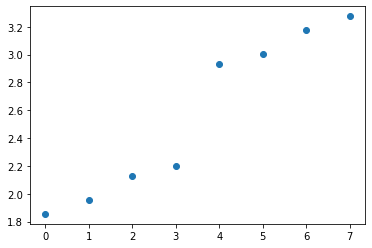

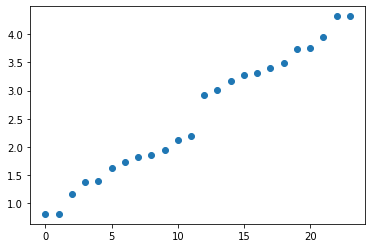

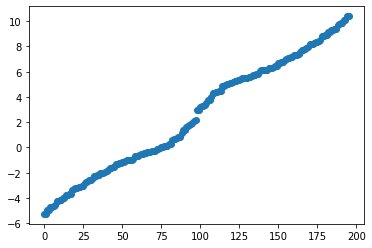

-5.2648
-5.25156
-4.97258
-4.92995
-4.7481
-4.74066
-4.6506
-4.57524
-4.26263
-4.22765
-4.19035
-4.1542
-4.01753
-4.01142
-3.80452
-3.75524
-3.68062
-3.67848
-3.36749
-3.2988
-3.21612
-3.21371
-3.14475
-3.10235
-3.08741
-3.07543
-2.81683
-2.73845
-2.643
-2.61487
-2.563
-2.45479
-2.28141
-2.2217
-2.19862
-2.16182
-2.05813
-2.04659


In [9]:
plt.plot(evals[ed-4:ed+4], 'o')
plt.show()

plt.plot(evals[ed-12:ed+12], 'o')
plt.show()

plt.plot(evals[:], 'o')
plt.show()

for ev in evals[0:38]:
    print(ev)

In [10]:
def visualize_backbone(ax, atoms):
    i_arr, j_arr = ase.neighborlist.neighbor_list('ij', atoms, 1.8)
    for i, j in zip(i_arr, j_arr):
        if i < j:
            p1 = atoms.positions[i]
            p2 = atoms.positions[j]
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k-', linewidth=2.0, solid_capstyle='round')
            
def visualize_evec(ax, atoms, evec):
    for at, e in zip(atoms, evec):
        p = at.position
        mod = np.abs(e)
        phase = np.angle(e)/np.pi
        col = sns_colors[int(phase)]
        circ = plt.Circle(p[:2], np.cbrt(mod), color=col, zorder=10)
        ax.add_artist(circ)

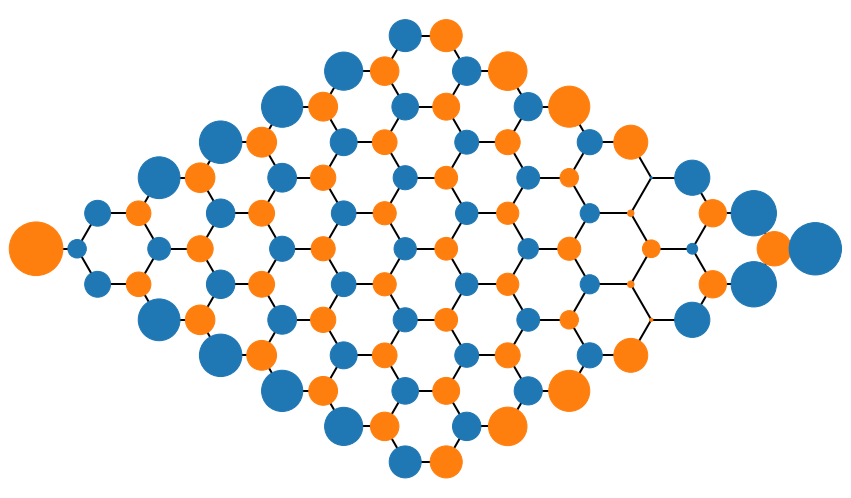

In [11]:
fig=plt.figure(figsize=(15,15))
ax = plt.gca()
ax.set_aspect('equal')
visualize_backbone(ax, geom)
visualize_evec(ax, geom, spin_difference)
plt.axis('off')

plt.xlim([min_coord_x, max_coord_x])
plt.ylim([min_coord_y, max_coord_y])

path = "../figures/figures_gnf/"
fig_name = path + "gnf{}x{}{}_M{}_U{}.pdf".format(
    gnf_size,
    gnf_size,
    sw_short,
    M_param,
    U_param,
)

plt.savefig(fig_name, dpi=1000, bbox_inches='tight')